# Problem Statement:

### Bank have a dataset of customers those who had taken loan from their bank and those who haven't. Make a prediction model to predict which customers should be targeted who will accept the PL (Personal Loan) request.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Loan_Modelling.csv',index_col=0)

In [3]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [6]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [7]:
for col in df.columns:
    print(col,df[col].unique(),sep="\n-------------\n")
    print('\n')

Age
-------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


Experience
-------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


Income
-------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 2

In [8]:
len(df[df['Experience']<0])

52

In [9]:
df[df['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0


In [10]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].describe().T

Age              23                  24                       25       \
Education         1         2         1         2         3    1    2   
count      7.000000  5.000000  5.000000  6.000000  6.000000  4.0  4.0   
mean      -1.285714 -2.200000 -1.800000 -1.166667 -2.333333 -1.0 -1.0   
std        0.755929  0.447214  0.447214  0.408248  0.516398  0.0  0.0   
min       -3.000000 -3.000000 -2.000000 -2.000000 -3.000000 -1.0 -1.0   
25%       -1.000000 -2.000000 -2.000000 -1.000000 -2.750000 -1.0 -1.0   
50%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
75%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
max       -1.000000 -2.000000 -1.000000 -1.000000 -2.000000 -1.0 -1.0   

Age                    26   28   29  
Education          3    2    3    3  
count      10.000000  1.0  1.0  3.0  
mean       -1.100000 -1.0 -2.0 -1.0  
std         0.316228  NaN  NaN  0.0  
min        -2.000000 -1.0 -2.0 -1.0  
25%        -1.000000 -1.0 -2.0 -1.0  
50%        -1.000000 -1.0 -2.0 -1.0  
75%        -1.000000 -1.0 -2.0 -1.0  
max        -1.000000 -1.0 -2.0 -1.0

In [11]:
df[df['Experience']==0].groupby(['Age','Education'])['Experience'].describe().T

Age         24             25             26              27        29   30
Education    1    2    3    1    2    3    1    2     3    2    3    3    3
count      8.0  2.0  1.0  3.0  6.0  8.0  6.0  9.0  13.0  3.0  5.0  1.0  1.0
mean       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
std        0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  NaN  NaN
min        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
25%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
50%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
75%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
max        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0

In [12]:
df[df['Experience']==0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
106,24,0,35,94704,3,0.1,2,0,0,1,0,1,0
152,26,0,132,92834,3,6.5,3,0,1,0,0,0,1
156,24,0,60,94596,4,1.6,1,0,0,0,0,1,0
157,26,0,15,92131,4,0.4,1,0,0,0,0,0,1
161,29,0,134,95819,4,6.5,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,26,0,75,94061,3,0.3,3,0,0,0,0,0,0
4902,26,0,54,96094,3,1.1,2,0,0,0,0,1,0
4935,26,0,85,93950,2,1.6,3,0,0,0,0,1,1


In [13]:
import zipcodes as zc

In [14]:
df['ZIPCode'].values

array([91107, 90089, 94720, ..., 93023, 90034, 92612], dtype=int64)

In [15]:
zc.list_all()

[{'zip_code': '00501',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['I R S Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.8179',
  'long': '-73.0453'},
 {'zip_code': '00544',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['Irs Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.7888',
  'long': '-73.0394'},
 {'zip_code': '00601',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Adjuntas',
  'acceptable_cities': [],
  'unacceptable_cities': ['Colinas Del Gigante',
   'Jard De Adjuntas',
   'Urb San Joaquin'],
  'state': 'PR',
  'county': 'Adjuntas Municipio',
  'time

In [16]:
zc.matching('91107')[0]['county']

'Los Angeles County'

In [17]:
df['County'] = df['ZIPCode'].apply(lambda x: zc.matching(str(x))[0]['county'] if len(zc.matching(str(x))) else x)

In [18]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [19]:
df['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

### Exploratory Data Analysis

In [20]:
df.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Seaborn Library
       
       1. Distribution plots (To visualize Single column's data distribution)
          a. distplot
          b. histplot
          c. kdeplot
          d. rugplot
          e. displot (another version of distplot)
          f. Jointplot (two columns data compared)
          g. scatterplot (two columns data compare)
       2. Categorical
          a. countplot
          b. barplot (one categorical along with one continous numerical)
          c. boxplot (one categorical along with one continous numerical)
          d. stripplot (one categorical along with one continous numerical)
          e. swarmplot (one categorical along with one continous numerical)
          f. violinplot (one categorical along with one continous numerical)
       3. Matrix
          a. heatmap
          b. clustermap
       4. Regression plot
          a. regplot
          b. lmplot
       5. Grids
          a. pairplot
          b. PairGrid
          c. JointGrid
          d. FaceGrid
          
       Note:- hue is used when we have categorical data

In [21]:
import seaborn as sns

In [22]:
sns.set_style('darkgrid') # whitegrid,dark, darkgrid, ticks

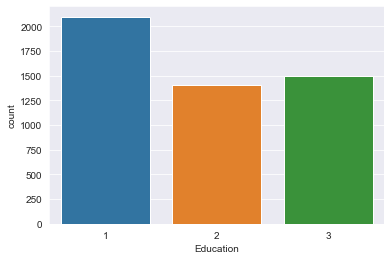

In [23]:
sns.countplot(x='Education',data=df)

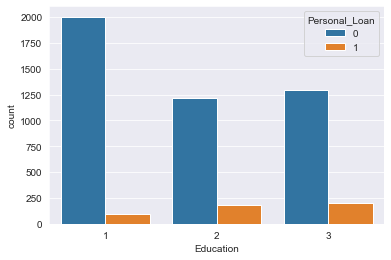

In [24]:
sns.countplot(x='Education',data=df,hue='Personal_Loan')

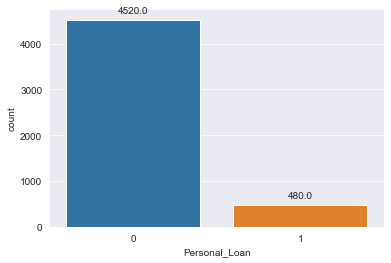

In [25]:
f = sns.countplot(x='Personal_Loan',data=df,)  # Lot of people haven't taken the loan
for i in f.patches:
    p= plt.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

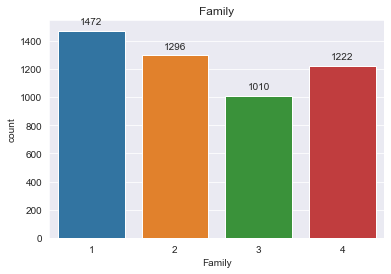

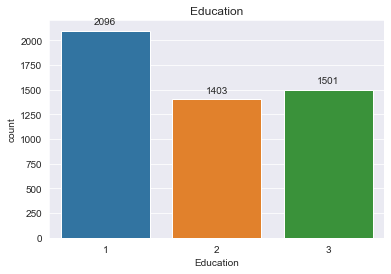

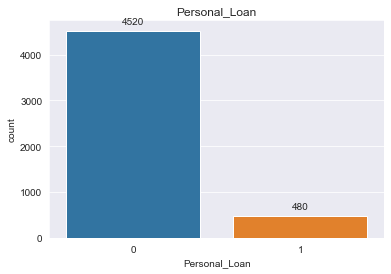

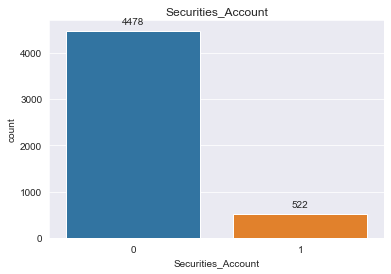

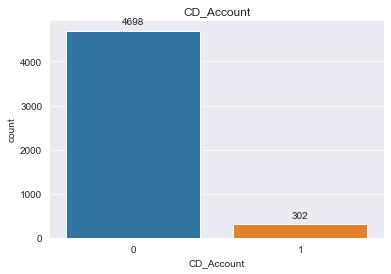

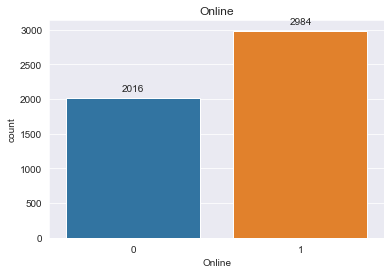

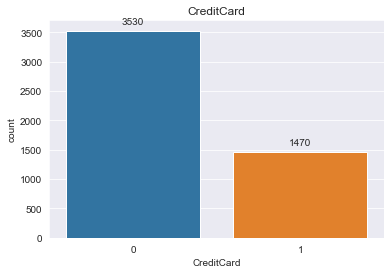

In [26]:
for col in ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']:
    f = sns.countplot(x=col,data=df)
    plt.title(col)
    for i in f.patches:
        x= i.get_x() + i.get_width()/2
        y= i.get_y() + i.get_height()
        plt.annotate(i.get_height(),(x,y),ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    plt.show()

Text(0.5, 1.0, 'Age')

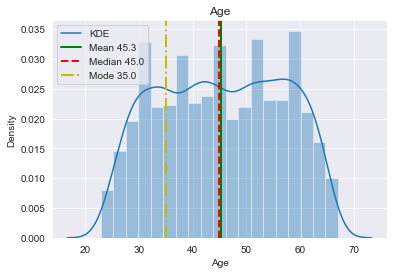

In [27]:
mean = df['Age'].mean()
median = df['Age'].median()
mode= df['Age'].mode().values[0]
sns.distplot(df['Age'])
plt.axvline(mean,color='g',ls='-',lw=2)
plt.axvline(median,color='r',ls='--',lw=2)
plt.axvline(mode,color='y',ls='-.',lw=2)
plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
plt.title('Age')

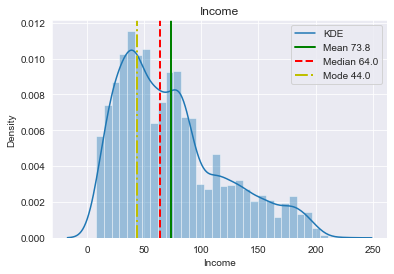

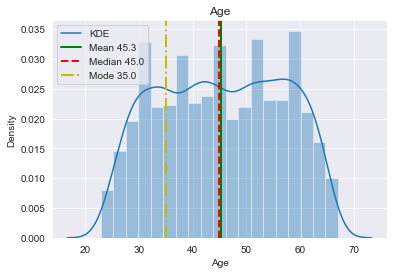

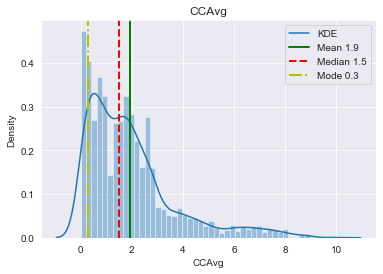

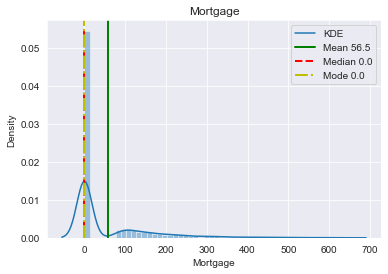

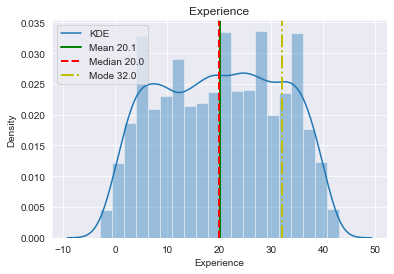

In [28]:
for i in ['Income','Age','CCAvg','Mortgage','Experience']:
    mean = df[i].mean()
    median = df[i].median()
    mode= df[i].mode().values[0]
    sns.distplot(df[i])
    plt.axvline(mean,color='g',ls='-',lw=2)
    plt.axvline(median,color='r',ls='--',lw=2)
    plt.axvline(mode,color='y',ls='-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
    plt.title(i)
    plt.show()

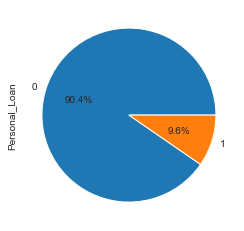

In [29]:
df['Personal_Loan'].value_counts().plot.pie(autopct='%1.1f%%')

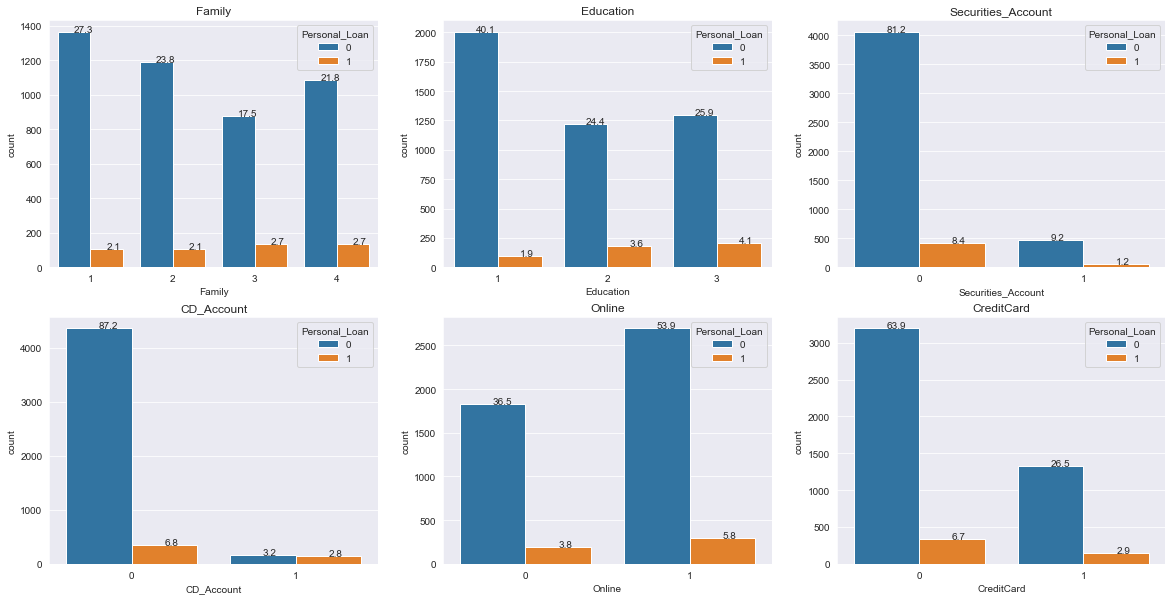

In [30]:
plt.figure(figsize=(20,10))
for i,col in enumerate(['Family','Education','Securities_Account','CD_Account','Online','CreditCard']):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=col, data=df,hue='Personal_Loan')
    plt.title(col)
    for p in ax.patches:
        perc = '{:.1f}'.format(100*p.get_height()/len(df[col]))
        x= p.get_x() + p.get_width()/2
        y= p.get_y() + p.get_height()
        plt.annotate(perc,(x,y))
        

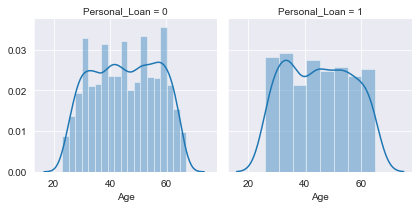

In [31]:
fg = sns.FacetGrid(data=df,col='Personal_Loan')
fg.map(sns.distplot,'Age')

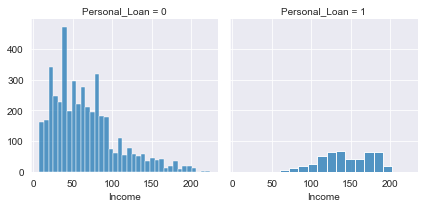

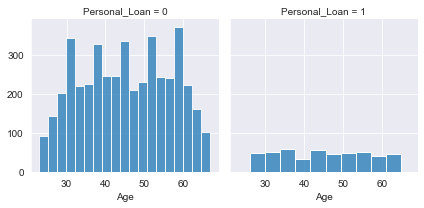

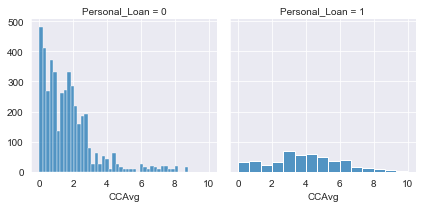

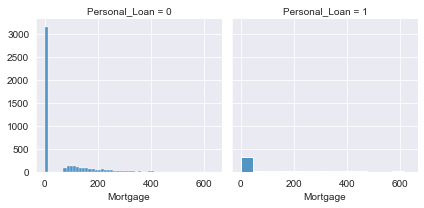

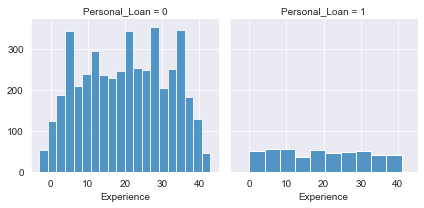

In [32]:
for i in ['Income','Age','CCAvg','Mortgage','Experience']:
    fg = sns.FacetGrid(data=df,col='Personal_Loan')
    fg.map(sns.histplot,i)
    plt.show()

### Working on Outliers

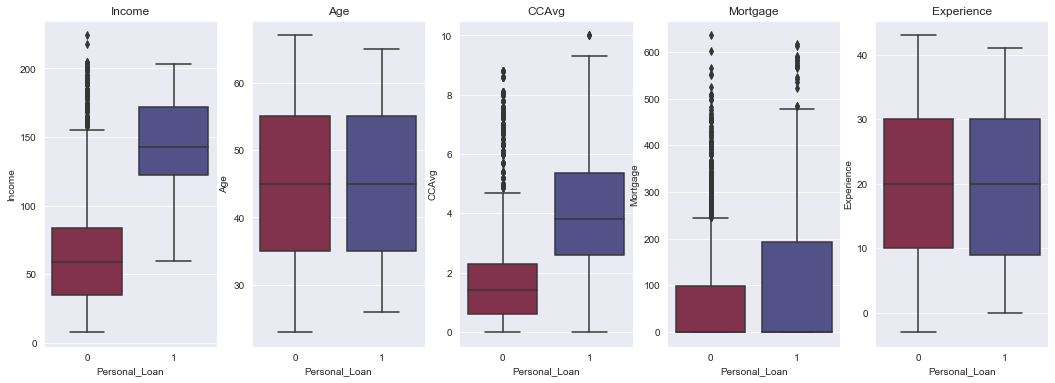

In [33]:
sns.set_palette('gist_stern')
plt.figure(figsize=(18,6))
for i,col in enumerate(['Income','Age','CCAvg','Mortgage','Experience']):
    plt.subplot(1,5,i+1)
    ax = sns.boxplot(x='Personal_Loan',y=col, data=df)
    plt.title(col)

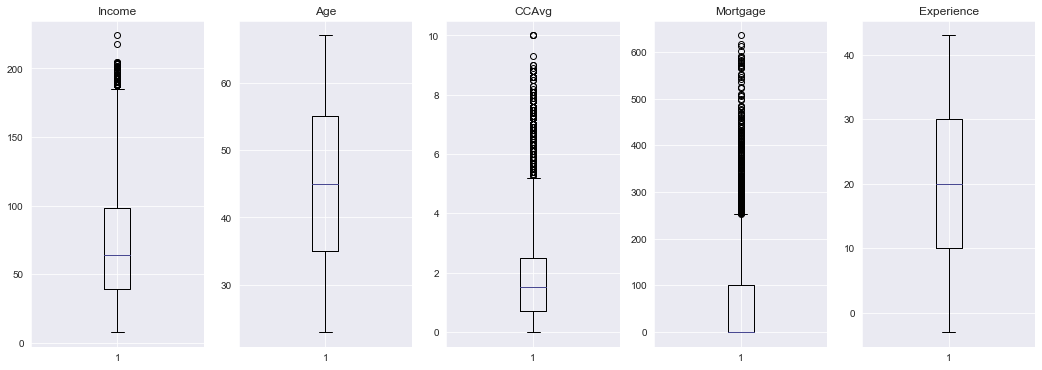

In [34]:
plt.figure(figsize=(18,6))
for i,col in enumerate(['Income','Age','CCAvg','Mortgage','Experience']):
    plt.subplot(1,5,i+1)
    plt.boxplot(x=df[col])
    plt.title(col)

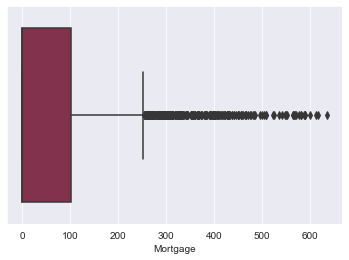

In [35]:
mortgage_out = df['Mortgage']
sns.boxplot(x=mortgage_out)

In [36]:
q1 = mortgage_out.quantile(0.25)
q3 = mortgage_out.quantile(0.75)
iqr = q3-q1
print("q1: {} , q3: {}, iqr: {}".format(q1,q3,iqr))

q1: 0.0 , q3: 101.0, iqr: 101.0


In [37]:
min_q = q1 - 1.5*iqr
max_q = q3 + 1.5*iqr
print(min_q,max_q)

-151.5 252.5


In [38]:
mort_fil = mortgage_out[(mortgage_out >= min_q)&(mortgage_out <= max_q)]

In [39]:
mort_fil.shape

(4709,)

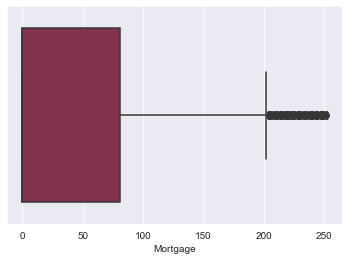

In [40]:
sns.boxplot(x=mort_fil)

In [41]:
pd.crosstab(index=df['County'],columns=df['Personal_Loan'])

Personal_Loan,0,1
County,,
92634,5,0
92717,19,3
93077,1,0
96651,6,0
Alameda County,456,44
Butte County,17,2
Contra Costa County,73,12
El Dorado County,16,1
Fresno County,24,2


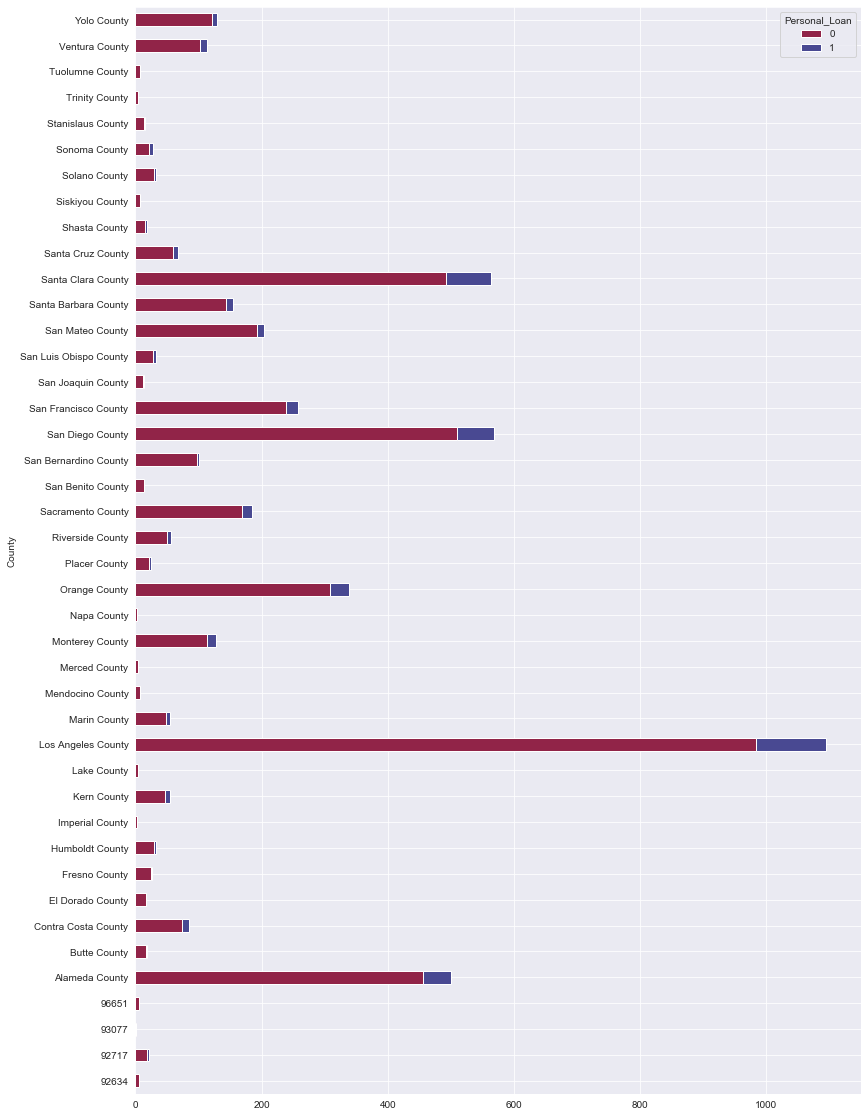

In [42]:
#sns.set_palette('Set2')
pd.crosstab(index=df['County'],columns=df['Personal_Loan']).plot(kind='barh',figsize=(13,20),stacked=True)

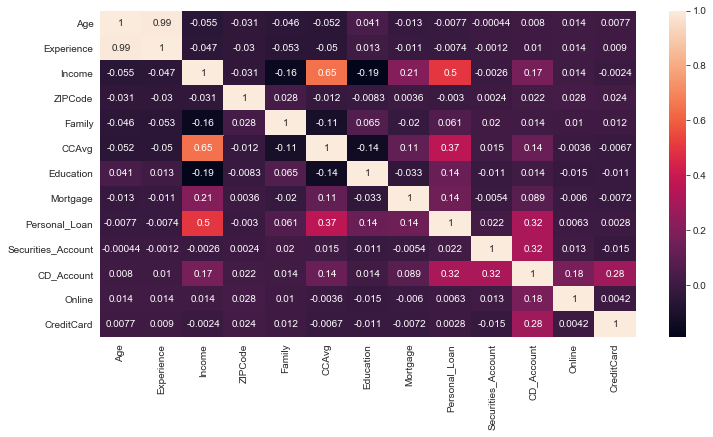

In [43]:
plt.figure(figsize=(12,6))
p=sns.heatmap(df.corr(),annot=True)  # Age and Experience are highly correlated

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x= df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']]
y= df['Personal_Loan']

In [46]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
def create_model(x,y,alpha=0):
    global pp
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=11)
    model_dt = DecisionTreeClassifier(ccp_alpha=alpha).fit(xtrain,ytrain)
    model_rf = RandomForestClassifier().fit(xtrain,ytrain)
    
    pp = model_dt.cost_complexity_pruning_path(xtrain,ytrain)
    
    print('Actual Outputs: ')
    print('-'*20)
    print(ytest.value_counts())
    print()
    
    print('Decision Tree')
    print('-'*20)
    print('Training Score: ',round(model_dt.score(xtrain,ytrain)*100,2))
    print('Testing Score: ',round(model_dt.score(xtest,ytest)*100,2))
    
    
    ypred_dt = model_dt.predict(xtest)
    cnf_dt = pd.DataFrame(confusion_matrix(ytest,ypred_dt),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf_dt,annot=True,fmt='d',cbar=None,cmap='YlGn')
    plt.show()
    
    print()
    print('Random Forest')
    print('-'*20)
    print('Training Score: ',round(model_rf.score(xtrain,ytrain)*100,2))
    print('Testing Score: ',round(model_rf.score(xtest,ytest)*100,2))
    
    ypred_rf = model_rf.predict(xtest)
    cnf_rf = pd.DataFrame(confusion_matrix(ytest,ypred_rf),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf_rf,annot=True,fmt='d',cbar=None,cmap='YlGn')
    
    return (model_dt,model_rf)

Actual Outputs: 
--------------------
0    1137
1     113
Name: Personal_Loan, dtype: int64

Decision Tree
--------------------
Training Score:  100.0
Testing Score:  98.72


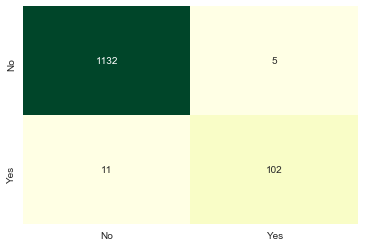


Random Forest
--------------------
Training Score:  100.0
Testing Score:  99.2


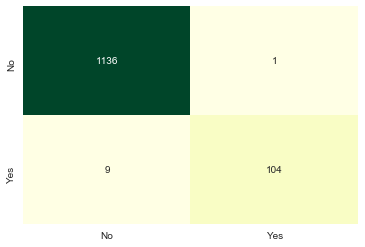

In [48]:
model_dt,model_rf = create_model(x,y)

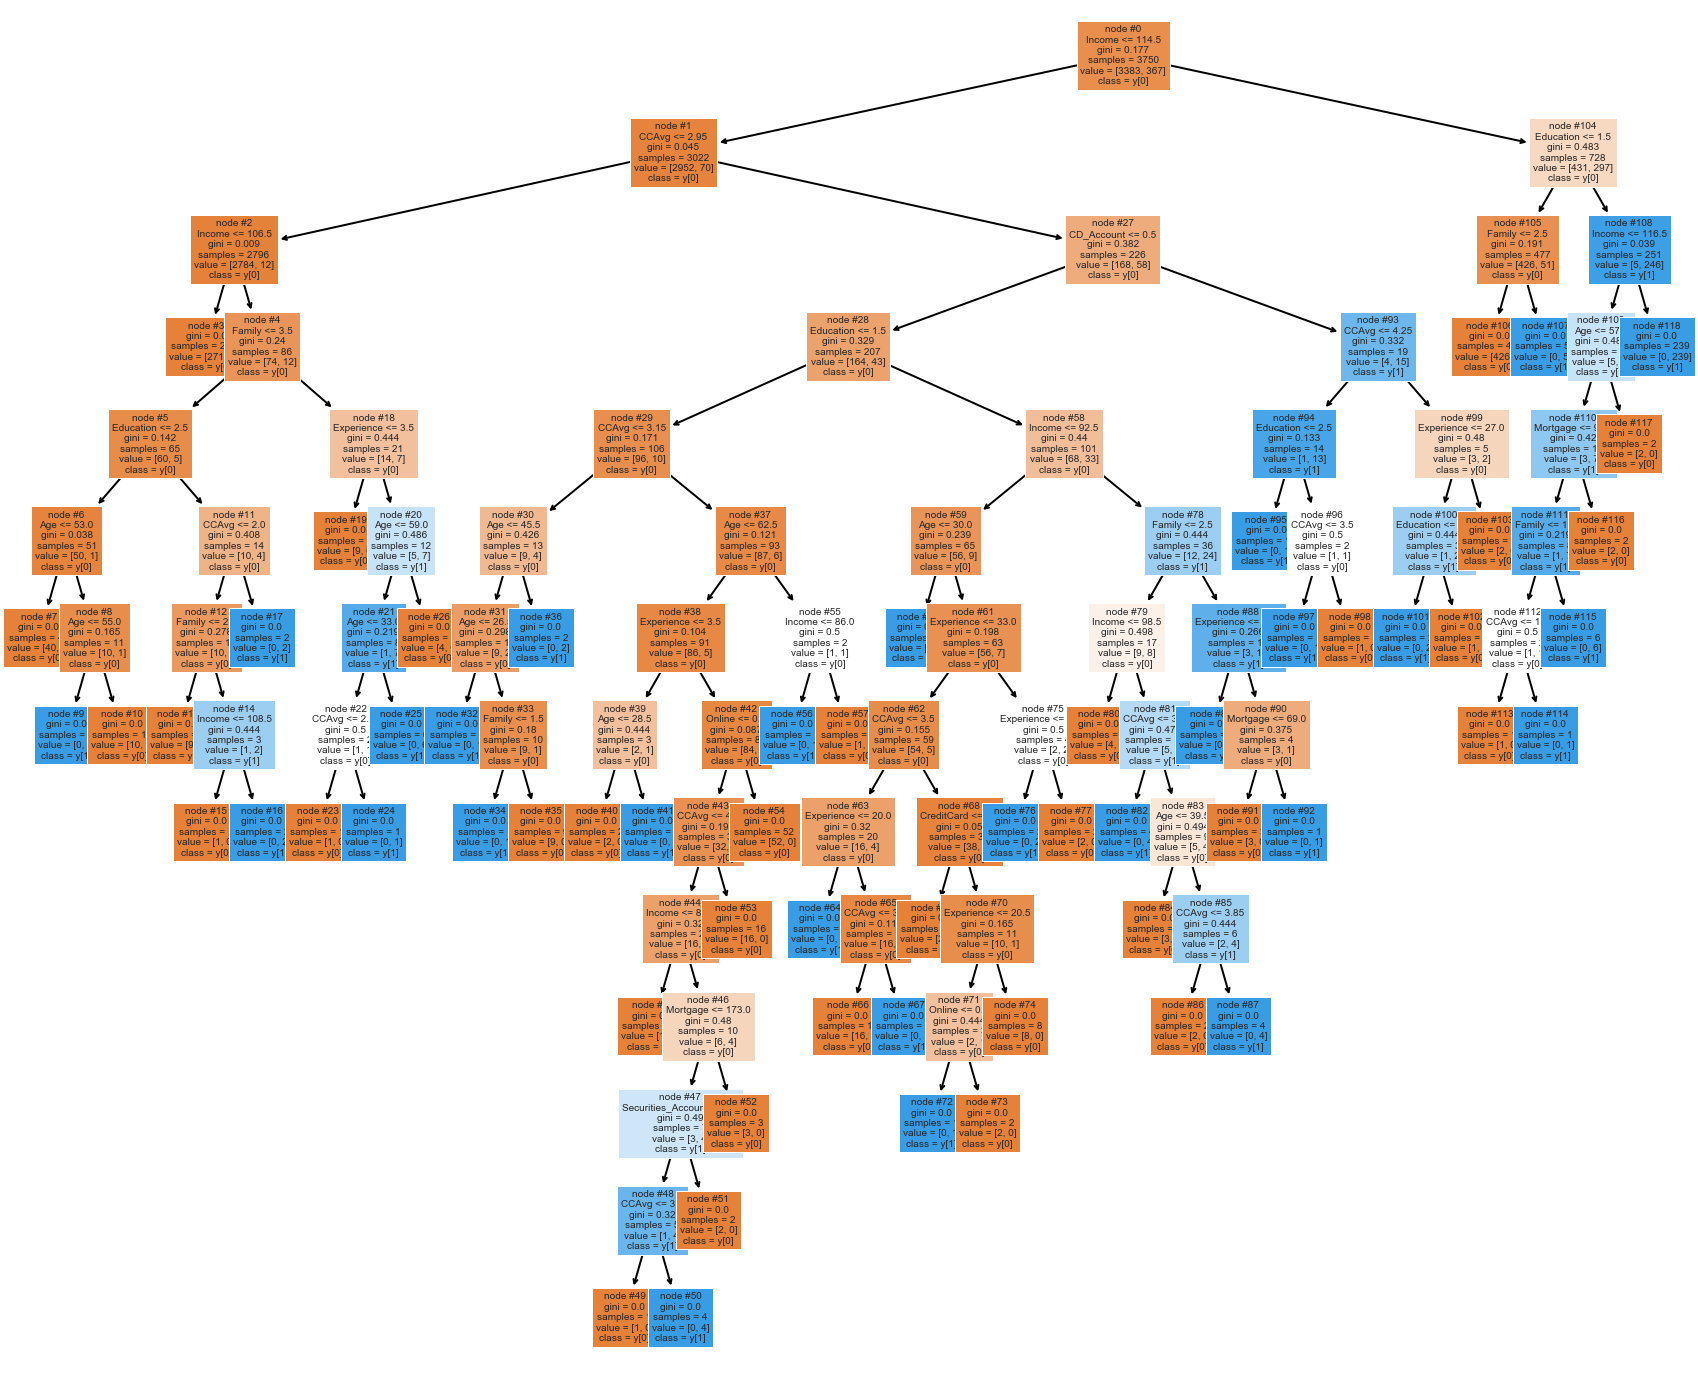

In [49]:
plt.figure(figsize=(30,25))
f = plot_tree(model_dt, feature_names= x.columns, filled=True,fontsize=10, node_ids=True, class_names=True)
for i in f:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

In [50]:
imp = pd.DataFrame(model_dt.feature_importances_,index=x.columns,columns=['Imp'])

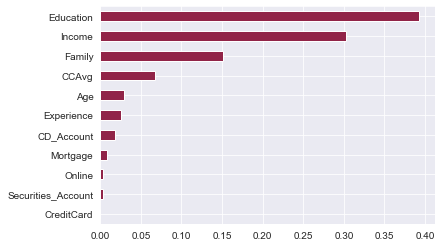

In [51]:
p=imp['Imp'].sort_values().plot.barh()

In [52]:
x2= df[['Education','Income','Family','CCAvg']]
y2 = y.copy()

Actual Outputs: 
--------------------
0    1137
1     113
Name: Personal_Loan, dtype: int64

Decision Tree
--------------------
Training Score:  99.97
Testing Score:  99.12


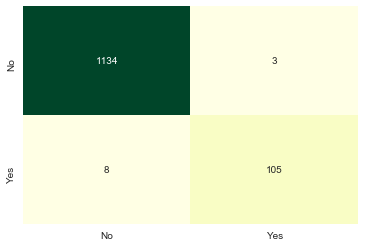


Random Forest
--------------------
Training Score:  99.97
Testing Score:  99.2


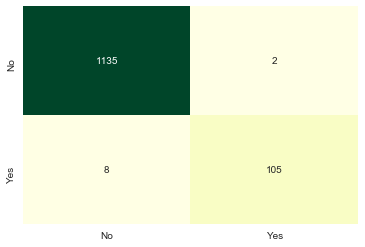

In [53]:
model_dt1,model_2= create_model(x2,y2)

### Checking for Overfitting (Pruning and Cross Validation)

### cost_complexity_pruning_path

In [54]:
pp   # calculating alpha and total impurities 

{'ccp_alphas': array([0.00000000e+00, 8.88888889e-05, 1.67320261e-04, 1.74291939e-04,
        1.77777778e-04, 1.77777778e-04, 1.77777778e-04, 1.77777778e-04,
        2.00000000e-04, 2.24488017e-04, 2.31111111e-04, 2.51851852e-04,
        2.84444444e-04, 3.38211382e-04, 3.55555556e-04, 3.55555556e-04,
        3.71358025e-04, 3.75308642e-04, 3.84000000e-04, 4.00000000e-04,
        4.14814815e-04, 4.26666667e-04, 4.44444444e-04, 4.50682261e-04,
        4.66666667e-04, 5.27702363e-04, 6.90370370e-04, 6.93089512e-04,
        7.09473684e-04, 7.64839506e-04, 8.65555445e-04, 8.71474984e-04,
        1.05799026e-03, 1.07463967e-03, 1.16585859e-03, 2.24969564e-03,
        7.10134141e-03, 2.42918239e-02, 5.66018154e-02]),
 'impurities': array([0.00026667, 0.00035556, 0.00085752, 0.00138039, 0.00173595,
        0.0020915 , 0.00226928, 0.00244706, 0.00284706, 0.00419399,
        0.00534954, 0.00585325, 0.00613769, 0.00715232, 0.00750788,
        0.00786344, 0.00897751, 0.01010344, 0.01087144, 0.0116

In [159]:
ccp_alpha = pp['ccp_alphas']
ccp_imp = pp['impurities']

In [160]:
ccp_alpha

array([0.        , 0.00017322, 0.00023333, 0.00023333, 0.00024762,
       0.00026144, 0.00026667, 0.00030299, 0.00032   , 0.00035556,
       0.0004    , 0.00043636, 0.00048196, 0.00050196, 0.0005277 ,
       0.00053333, 0.00054444, 0.00054701, 0.00054897, 0.00058786,
       0.0006178 , 0.00080392, 0.00081687, 0.00085959, 0.00086556,
       0.00105799, 0.00246858, 0.00314108, 0.00710134, 0.02429182,
       0.05660182])

In [161]:
train_x,test_x,train_y,test_y = train_test_split(x2,y2,test_size=0.25,random_state=1)
clfs=[]
for alpha in ccp_alpha:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(train_x,train_y)
    clfs.append(clf)
print('Number of Nodes in the last tree is: {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count, ccp_alpha[-1]))

Number of Nodes in the last tree is: 1 with ccp_alpha: 0.05660181543167509


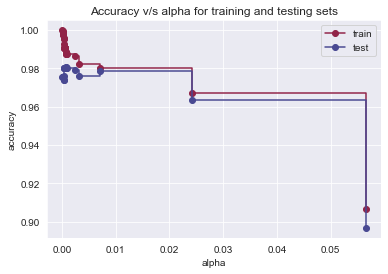

In [168]:
train_scores = [clf.score(train_x,train_y) for clf in clfs]
test_scores = [clf.score(test_x,test_y) for clf in clfs]

fig,ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy v/s alpha for training and testing sets')
ax.plot(ccp_alpha,train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alpha,test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

Text(0, 0.5, 'Impurities -->')

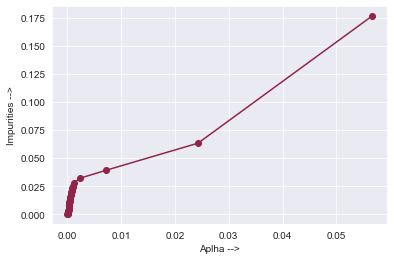

In [57]:
plt.plot(ccp_alpha,ccp_imp,marker='o')
plt.xlabel('Aplha -->')
plt.ylabel('Impurities -->')

In [58]:
ccp_alpha.sort()

In [59]:
alpha = ccp_alpha[-4]

In [60]:
alpha

0.0022496956420558975

Actual Outputs: 
--------------------
0    1137
1     113
Name: Personal_Loan, dtype: int64

Decision Tree
--------------------
Training Score:  98.61
Testing Score:  98.96


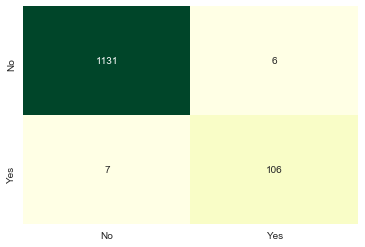


Random Forest
--------------------
Training Score:  100.0
Testing Score:  99.04


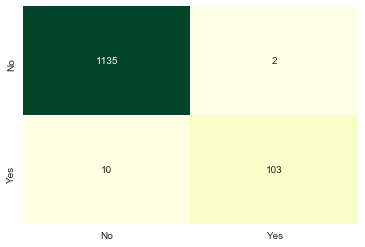

In [61]:
model_dt_p,model_rf_p = create_model(x,y,alpha)

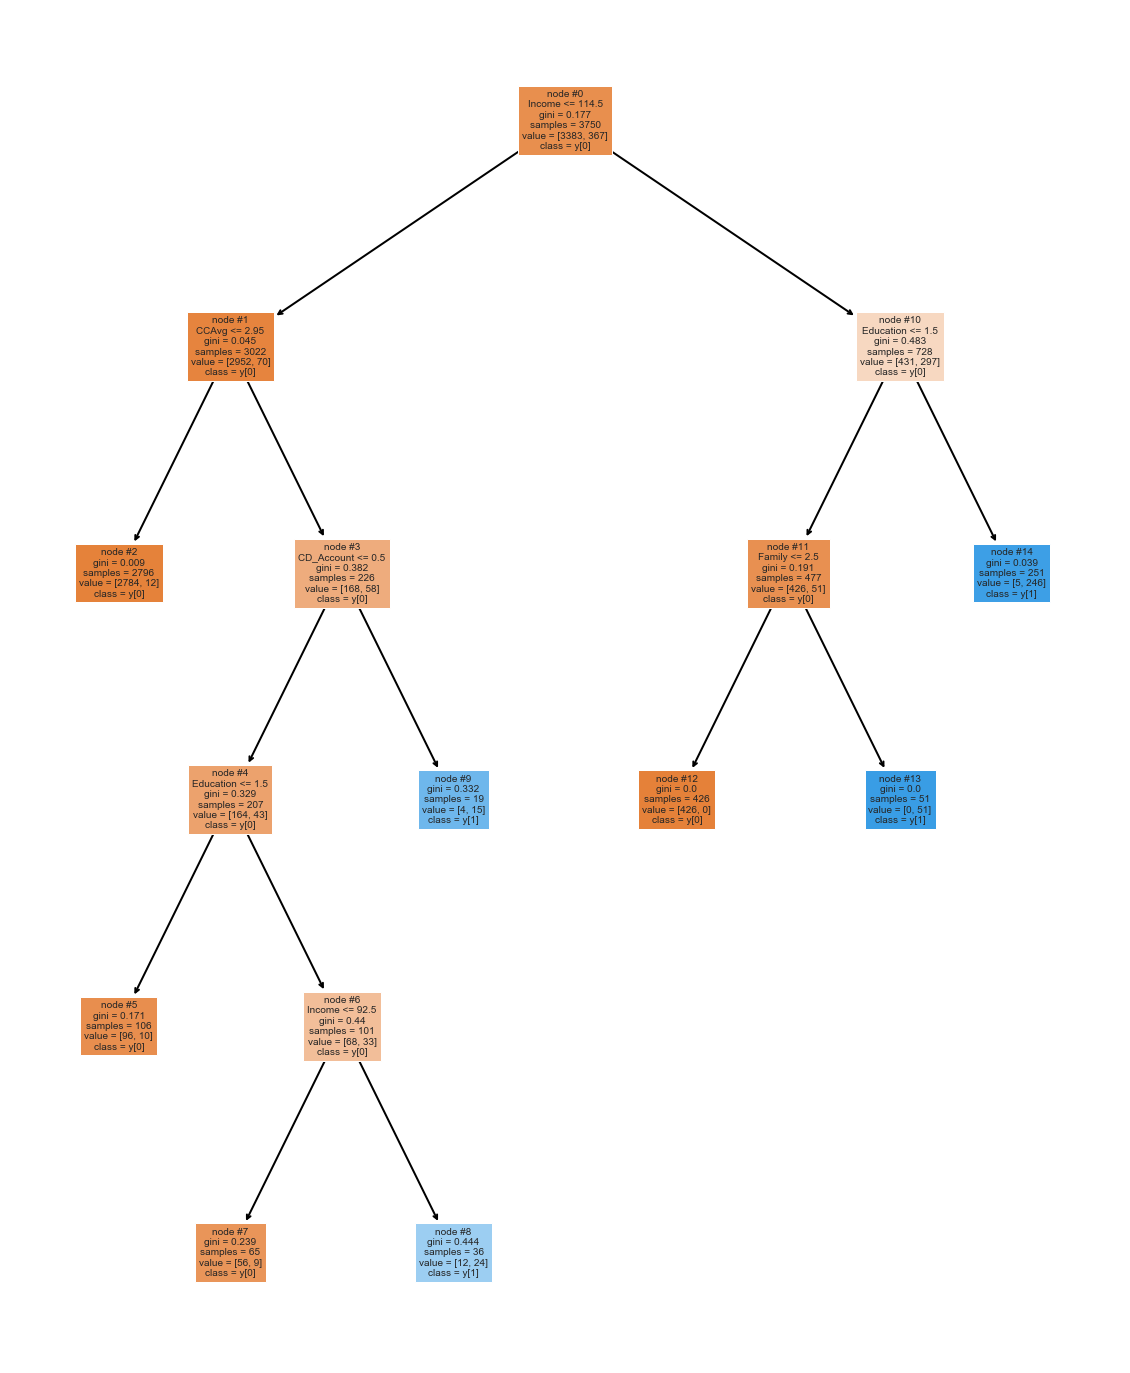

In [158]:
plt.figure(figsize=(20,25))
f = plot_tree(model_dt_p, feature_names= x.columns, filled=True,fontsize=10, node_ids=True, class_names=True)
for i in f:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

### Cross Validation

In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [171]:
total_scores=[]
total_std = []
for i in range(2,11):
    cv = KFold(i,shuffle=True,random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    total_scores.append(round(np.mean(scores)*100,2))
    total_std.append(np.std(scores))

Text(0, 0.5, 'Mean Accuracy Score-->')

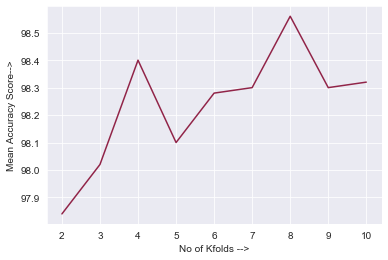

In [173]:
plt.plot(range(2,11),total_scores)
plt.xlabel('No of Kfolds -->')
plt.ylabel('Mean Accuracy Score-->')

Text(0, 0.5, 'Deviation in Accuracy Score-->')

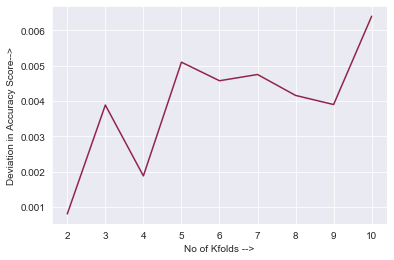

In [174]:
plt.plot(range(2,11),total_std)
plt.xlabel('No of Kfolds -->')
plt.ylabel('Deviation in Accuracy Score-->')

In [175]:
cv = KFold(4,shuffle=True,random_state=1)
model = DecisionTreeClassifier()

In [177]:
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (round(np.mean(scores)*100,2), np.std(scores)))

Accuracy: 98.280 (0.002)
